In [1]:
import pandas as pd
import numpy as np
import io
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import cross_val_score

In [2]:
 uploaded = files.upload()

Saving starting_pitching.csv to starting_pitching.csv


In [3]:
starting = pd.read_csv("starting_pitching.csv")

In [5]:
# get rid of all data from the year 2020 
starting = starting.loc[starting.Year != 2020, ]

In [6]:
ml_starting = starting.drop(['Year', 'Tm', 'G'], axis = 1)
ml_starting.head()

,GS,Wgs,Lgs,ND,Wchp,Ltuf,Wtm,Ltm,tmW-L%,Wlst,...,RS/GS,RS/IP,IP/GS,Pit/GS,<80,80-99,100-119,≥120,Max,Playoff
0,162.0,53.0,56.0,53.0,16.0,12.0,82.0,80.0,0.506,14.0,...,5.4,5.2,5.5,92.0,35.0,56.0,64.0,7.0,132.0,0
1,162.0,62.0,53.0,47.0,14.0,13.0,85.0,77.0,0.525,16.0,...,4.9,4.8,6.2,95.0,28.0,67.0,45.0,22.0,145.0,0
2,162.0,76.0,49.0,37.0,18.0,12.0,95.0,67.0,0.586,14.0,...,5.1,4.8,6.4,96.0,23.0,71.0,61.0,7.0,140.0,1
3,162.0,52.0,67.0,43.0,14.0,17.0,74.0,88.0,0.457,20.0,...,5.0,4.9,6.2,102.0,19.0,45.0,67.0,31.0,137.0,0
4,162.0,56.0,54.0,52.0,17.0,14.0,85.0,77.0,0.525,12.0,...,4.9,4.7,5.5,89.0,48.0,67.0,38.0,9.0,134.0,0


## **LOGISTIC REGRESSION**

In [7]:
x = ml_starting.drop('Playoff', axis = 1)
y = ml_starting.Playoff
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [9]:
logreg_model = LogisticRegression(max_iter = 10000)

In [10]:
logreg_model.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [11]:
logreg_predicted = logreg_model.predict(xtest)
logreg_actual = ytest

In [12]:
print(metrics.accuracy_score(logreg_predicted, logreg_actual))

0.9113924050632911


In [13]:
upload = files.upload()

Saving stats_2022.txt to stats_2022.txt


In [14]:
# Provided by Baseball-Reference.com. Generated 8/4/2022.
starting2022 = pd.read_csv('stats_2022.txt')
starting2022.head()

,Tm,G,GS,Wgs,Lgs,ND,Wchp,Ltuf,Wtm,Ltm,...,lDR,RS/GS,RS/IP,IP/GS,Pit/GS,<80,80-99,100-119,≥120,Max
0,Arizona Diamondbacks,104,104,27,32,45,11,3,46,58,...,58,4.3,4.0,5.2,86,30,56,18,0,115
1,Atlanta Braves,105,105,44,28,33,16,3,63,42,...,62,4.9,4.7,5.5,90,20,61,24,0,107
2,Baltimore Orioles,105,105,26,29,50,11,4,54,51,...,54,4.3,3.7,4.8,79,46,49,10,0,117
3,Boston Red Sox,106,106,30,32,44,10,3,53,53,...,58,4.5,4.3,4.9,80,46,49,11,0,112
4,Chicago Cubs,102,102,21,40,41,10,2,41,61,...,57,4.2,4.6,4.7,80,38,56,8,0,116


In [15]:
to_numeric_columns = ['G','GS','Wgs','Lgs','ND','Wchp','Ltuf','Wtm','Ltm','Wlst','Lsv','CG','SHO','QS','GmScA','Best','Wrst','BQR','BQS','sDR','lDR','Pit/GS','<80','80-99','100-119','≥120','Max', 'tmW-L%','RS/GS','RS/IP','IP/GS']

In [16]:
# convert columns to appropriate data types
starting2022[to_numeric_columns] = starting2022[to_numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)
starting2022['QS%'] = starting2022['QS%'].map(lambda x: x.rstrip('%')).astype('int') / 100

In [17]:
# adjust certain columns to represent full season by multiplying them by 162 / G
target_columns = [col not in ['Tm', 'G', 'tmW-L%','RS/GS','RS/IP','IP/GS', 'QS%'] for col in starting2022.columns]
for col in starting2022.columns[target_columns]:
    starting2022[col] = starting2022[col] * (162.0 / starting2022.G)

In [18]:
starting2022

,Tm,G,GS,Wgs,Lgs,ND,Wchp,Ltuf,Wtm,Ltm,...,lDR,RS/GS,RS/IP,IP/GS,Pit/GS,<80,80-99,100-119,≥120,Max
0,Arizona Diamondbacks,104.0,162.0,42.057692,49.846154,70.096154,17.134615,4.673077,71.653846,90.346154,...,90.346154,4.3,4.0,5.2,133.961538,46.730769,87.230769,28.038462,0.000000,179.134615
1,Atlanta Braves,105.0,162.0,67.885714,43.200000,50.914286,24.685714,4.628571,97.200000,64.800000,...,95.657143,4.9,4.7,5.5,138.857143,30.857143,94.114286,37.028571,0.000000,165.085714
2,Baltimore Orioles,105.0,162.0,40.114286,44.742857,77.142857,16.971429,6.171429,83.314286,78.685714,...,83.314286,4.3,3.7,4.8,121.885714,70.971429,75.600000,15.428571,0.000000,180.514286
3,Boston Red Sox,106.0,162.0,45.849057,48.905660,67.245283,15.283019,4.584906,81.000000,81.000000,...,88.641509,4.5,4.3,4.9,122.264151,70.301887,74.886792,16.811321,0.000000,171.169811
4,Chicago Cubs,102.0,162.0,33.352941,63.529412,65.117647,15.882353,3.176471,65.117647,96.882353,...,90.529412,4.2,4.6,4.7,127.058824,60.352941,88.941176,12.705882,0.000000,184.235294
5,Chicago White Sox,104.0,162.0,49.846154,59.192308,52.961538,21.807692,10.903846,82.557692,79.442308,...,101.250000,4.4,3.8,5.2,138.634615,29.596154,95.019231,37.384615,0.000000,183.807692
6,Cincinnati Reds,104.0,162.0,37.384615,73.211538,51.403846,12.461538,9.346154,65.423077,96.576923,...,95.019231,4.4,3.8,5.1,140.192308,37.384615,73.211538,49.846154,1.557692,191.596154
7,Cleveland Guardians,104.0,162.0,38.942308,57.634615,65.423077,7.788462,14.019231,84.115385,77.884615,...,116.826923,4.5,4.3,5.5,137.076923,32.711538,115.269231,14.019231,0.000000,169.788462
8,Colorado Rockies,107.0,162.0,42.392523,63.588785,56.018692,6.056075,9.084112,69.644860,92.355140,...,101.439252,4.5,4.0,5.3,133.233645,30.280374,107.495327,24.224299,0.000000,162.000000
9,Detroit Tigers,106.0,162.0,29.037736,68.773585,64.188679,10.698113,4.584906,64.188679,97.811321,...,90.169811,3.3,2.8,4.8,122.264151,65.716981,85.584906,10.698113,0.000000,165.056604


In [19]:
# create dataframe for ML 
ml_starting2022 = starting2022.drop(["Tm", "G"], axis = 1)

In [20]:
print(ml_starting.shape)
print(ml_starting2022.shape )

(630, 32)
(30, 31)


In [21]:
# use 2022 dataset to predict which MLB teams will make playoffs
logreg_predictions2022 = logreg_model.predict(ml_starting2022)

In [22]:
# create dataframe of predictions produced by logistic regression
logreg_playoff_predictions2022 = pd.DataFrame({'2022 Teams': starting2022.Tm, 'Playoff Prediction': logreg_predictions2022})

In [23]:
logreg_playoff_teams2022 = logreg_playoff_predictions2022.loc[logreg_playoff_predictions2022['Playoff Prediction'] == 1, '2022 Teams']
len(logreg_playoff_teams2022)

1

In [24]:
logreg_model = LogisticRegression(max_iter = 10000)
playoff_teams = Counter()
logreg_accuracy = []

for rep in range(50):
  xtrain, xtest, ytrain, ytest = train_test_split(x,y)
  logreg_model.fit(xtrain, ytrain)

  predictions = logreg_model.predict(xtest)
  logreg_accuracy.append(metrics.accuracy_score(predictions, ytest))

  predictions2022 = logreg_model.predict(ml_starting2022)
  predictions_table = pd.DataFrame({'2022 Teams':starting2022.Tm, 'Playoff Prediction':predictions2022})
  playoff_teams2022 = predictions_table.loc[predictions_table['Playoff Prediction'] == 1, '2022 Teams']
  playoff_teams.update(list(playoff_teams2022))

In [25]:
logreg_result = pd.Series([appearance / 50 for appearance in playoff_teams.values()], index = playoff_teams.keys()).sort_values(ascending = False)
logreg_result                        

Los Angeles Dodgers      0.98
Houston Astros           0.92
New York Yankees         0.92
New York Mets            0.84
Atlanta Braves           0.72
San Diego Padres         0.68
Toronto Blue Jays        0.56
Seattle Mariners         0.54
Philadelphia Phillies    0.54
Milwaukee Brewers        0.52
St. Louis Cardinals      0.46
Tampa Bay Rays           0.46
Minnesota Twins          0.46
Baltimore Orioles        0.44
Cleveland Guardians      0.42
Chicago White Sox        0.36
Boston Red Sox           0.24
Miami Marlins            0.18
San Francisco Giants     0.18
Arizona Diamondbacks     0.10
Los Angeles Angels       0.08
Texas Rangers            0.08
Colorado Rockies         0.04
Detroit Tigers           0.04
Pittsburgh Pirates       0.04
Chicago Cubs             0.02
Cincinnati Reds          0.02
Kansas City Royals       0.02
dtype: float64

In [26]:
logreg_accuracy = pd.Series(logreg_accuracy)
logreg_accuracy.describe()

count    50.000000
mean      0.911899
std       0.017290
min       0.873418
25%       0.898734
50%       0.911392
75%       0.924051
max       0.949367
dtype: float64

### So What is this Logistic Regression Model doing?
- The Logreg model creates a function that contains coefficients, or predicted weights, to predict an outcome given a set of data. In this case, the logreg model takes in data from previous MLB seasons to gather metrics such as QS% and Pit/GS and uses these quantities as coefficients in its generated function to predict which team is most likely to make playoffs. 

## **Decision Tree**

In [31]:
# create test and train datasets
x2 = ml_starting.drop('Playoff', axis = 1)
y2 = ml_starting.Playoff
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2)

In [32]:
dt_model = tree.DecisionTreeClassifier()
dt_model = dt_model.fit(xtrain2,ytrain2)

In [33]:
dt_predicted = dt_model.predict(xtest2)
dt_actual = ytest2

In [34]:
print(metrics.accuracy_score(dt_predicted, dt_actual))

0.8924050632911392


In [35]:
# use 2022 dataset and Decision Tree Model to predict which MLB teams will make playoffs
dt_predictions2022 = dt_model.predict(ml_starting2022)

In [36]:
dt_playoff_predictions2022 = pd.DataFrame({'2022 Teams': starting2022.Tm, 'Playoff Prediction': dt_predictions2022})
dt_playoff_teams2022 = dt_playoff_predictions2022.loc[dt_playoff_predictions2022['Playoff Prediction'] == 1, '2022 Teams']

In [37]:
dt_playoff_teams = Counter()
dt_model = tree.DecisionTreeClassifier()
dt_accuracy = []

for rep in range(1000):
  xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2,y2)
  dt_model.fit(xtrain2, ytrain2)

  dt_predictions = dt_model.predict(xtest2)
  dt_accuracy.append(metrics.accuracy_score(dt_predictions, ytest2))

  dt_predictions2022 = dt_model.predict(ml_starting2022)
  dt_predictions_table = pd.DataFrame({'2022 Teams':starting2022.Tm, 'Playoff Prediction':dt_predictions2022})
  dt_playoff_teams2022 = dt_predictions_table.loc[dt_predictions_table['Playoff Prediction'] == 1, '2022 Teams']
  dt_playoff_teams.update(list(dt_playoff_teams2022))

In [38]:
dt_prediction_df= pd.DataFrame({'Team':dt_playoff_teams.keys(), '# of Predicted Appearances In Playoffs':dt_playoff_teams.values()}).sort_values(by = '# of Predicted Appearances In Playoffs', ascending = False)
dt_prediction_df

,Team,# of Predicted Appearances In Playoffs
6,New York Yankees,996
3,Los Angeles Dodgers,994
2,Houston Astros,992
5,New York Mets,951
0,Atlanta Braves,881
7,San Diego Padres,880
4,Milwaukee Brewers,593
9,Toronto Blue Jays,536
8,Seattle Mariners,512
13,Philadelphia Phillies,384


In [39]:
dt_accuracy = pd.Series(dt_accuracy)
dt_accuracy.describe()

count    1000.000000
mean        0.884177
std         0.023095
min         0.810127
25%         0.867089
50%         0.886076
75%         0.898734
max         0.962025
dtype: float64

In [40]:
dt_result = pd.Series([appearance / 1000 for appearance in dt_playoff_teams.values()], index = dt_playoff_teams.keys()).sort_values(ascending = False)
dt_result    

New York Yankees         0.996
Los Angeles Dodgers      0.994
Houston Astros           0.992
New York Mets            0.951
Atlanta Braves           0.881
San Diego Padres         0.880
Milwaukee Brewers        0.593
Toronto Blue Jays        0.536
Seattle Mariners         0.512
Philadelphia Phillies    0.384
St. Louis Cardinals      0.341
Minnesota Twins          0.201
Chicago White Sox        0.200
Tampa Bay Rays           0.184
Baltimore Orioles        0.146
Cleveland Guardians      0.096
Arizona Diamondbacks     0.015
San Francisco Giants     0.009
Texas Rangers            0.009
Washington Nationals     0.007
Chicago Cubs             0.006
Miami Marlins            0.004
Detroit Tigers           0.004
Los Angeles Angels       0.003
Boston Red Sox           0.002
dtype: float64

### So What is the Decision Tree Model doing?
A decision tree model simply put is a piecewise constant approximation method. The model does this by learning from the data that its given to approximate a sin curve by creating its own if-else decisions. In this case, the decision tree model takes in the metrics of the MLB data given, and formulates its own decision rules for each data feature and finally predicts the value of a target variable by doing so.

## **K Nearest Neighbors**

In [45]:
# prepare and split data 
x3 = ml_starting.drop('Playoff', axis = 1)
y3 = ml_starting.Playoff

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x3, y3)

KNeighborsClassifier(n_neighbors=2)

In [47]:
# code from DSU curriculum
mean_fold_errors = []

for num_neighbors in range(1, 20):
    np.random.seed(0)   # to ensure we use the same random folds
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    fold_errors = 1 - cross_val_score(knn, x3, y3, cv = 5)   # 5-fold CV
    mean_fold_errors.append(np.mean(fold_errors))

    print("Num neighbors =", num_neighbors)
    print("K-fold CV errors:", np.round(fold_errors, 3))
    print("K-fold CV mean error:", np.round(mean_fold_errors[-1], 3))
    print("–"*50)

Num neighbors = 1
K-fold CV errors: [0.167 0.183 0.151 0.214 0.143]
K-fold CV mean error: 0.171
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 2
K-fold CV errors: [0.183 0.19  0.214 0.19  0.206]
K-fold CV mean error: 0.197
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 3
K-fold CV errors: [0.127 0.159 0.167 0.111 0.19 ]
K-fold CV mean error: 0.151
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 4
K-fold CV errors: [0.167 0.159 0.167 0.103 0.183]
K-fold CV mean error: 0.156
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 5
K-fold CV errors: [0.135 0.159 0.19  0.095 0.167]
K-fold CV mean error: 0.149
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 6
K-fold CV errors: [0.159 0.159 0.143 0.127 0.167]
K-fold CV mean error: 0.151
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 7
K-fold CV errors: [0.135 0.143 0.151 0.087 0.127]
K-fold CV mean error: 0.129
––––––––––––––––––––––

In [48]:
# choose optimal k-neighbors and build final model
import warnings

final_knn = KNeighborsClassifier(n_neighbors=9)
knn_accuracy = [] 
knn_playoff_teams = Counter()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for rep in range(1200):
      xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x3, y3, test_size=0.2)
      final_knn.fit(xtrain3, ytrain3)

      knn_predictions = final_knn.predict(xtest3)
      knn_accuracy.append(metrics.accuracy_score(knn_predictions, ytest3))

      knn_predictions2022 = final_knn.predict(ml_starting2022)
      knn_predictions_table = pd.DataFrame({'2022 Teams':starting2022.Tm, 'Playoff Prediction':knn_predictions2022})
      knn_playoff_teams2022 = knn_predictions_table.loc[knn_predictions_table['Playoff Prediction'] == 1, '2022 Teams']
      knn_playoff_teams.update(list(knn_playoff_teams2022))

In [49]:
knn_accuracy = pd.Series(knn_accuracy)
knn_accuracy.describe()

count    1200.000000
mean        0.877421
std         0.027394
min         0.777778
25%         0.857143
50%         0.880952
75%         0.896825
max         0.960317
dtype: float64

In [61]:
knn_result = pd.Series([appearance / 1200 for appearance in knn_playoff_teams.values()], index = knn_playoff_teams.keys()).sort_values(ascending = False)
knn_result  

Los Angeles Dodgers      1.000000
Houston Astros           1.000000
New York Yankees         1.000000
Atlanta Braves           0.989167
New York Mets            0.985000
San Diego Padres         0.944167
Toronto Blue Jays        0.910000
Milwaukee Brewers        0.379167
Philadelphia Phillies    0.301667
Tampa Bay Rays           0.099167
Boston Red Sox           0.076667
Minnesota Twins          0.056667
Seattle Mariners         0.025000
Cleveland Guardians      0.018333
Baltimore Orioles        0.010000
Los Angeles Angels       0.008333
Chicago White Sox        0.000833
dtype: float64

In [50]:
knn_playoff_teams

Counter({'Atlanta Braves': 1187,
         'Houston Astros': 1200,
         'Los Angeles Dodgers': 1200,
         'Milwaukee Brewers': 455,
         'New York Mets': 1182,
         'New York Yankees': 1200,
         'Philadelphia Phillies': 362,
         'San Diego Padres': 1133,
         'Toronto Blue Jays': 1092,
         'Minnesota Twins': 68,
         'Tampa Bay Rays': 119,
         'Seattle Mariners': 30,
         'Baltimore Orioles': 12,
         'Cleveland Guardians': 22,
         'Boston Red Sox': 92,
         'Los Angeles Angels': 10,
         'Chicago White Sox': 1})

Accuracy: 81.75%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


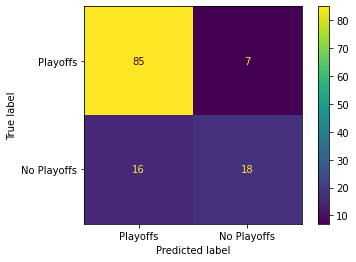

<Figure size 720x576 with 0 Axes>

In [51]:
# visualization of model performance and accuracy
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(f"Accuracy: {final_knn.score(xtest3, ytest3)*100:.2f}%")
plot_confusion_matrix(final_knn, xtest3, ytest3, display_labels=["Playoffs", "No Playoffs"])
plt.figure(figsize=(10,8))
plt.show()

In [52]:
knn_prediction2022 = final_knn.predict((ml_starting2022))
knn_prediction_teams = starting2022.Tm[knn_prediction2022 == 1]

In [53]:
knn_prediction2022

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0])

### So What is the KNN model doing?
The KNN algorithm assings its own 'label' to a new datapoint that it is given based on the labels of *k* closest training data points. In this case, the algorithm is given a MLB data set, which causes the algorithm to create its own clusters based on how similar the datapoints are to each other. 

# ML Model Accuracy Visualizations


## Logistic Regression

In [54]:
# abbreviations for each MLB team
MLB_abr_map = {'Arizona Diamondbacks':'ARI', 'Atlanta Braves':'ATL', 'Baltimore Orioles':'BAL',
               'Boston Red Sox':'BOS', 'Chicago Cubs':'CHC', 'Chicago White Sox':'CHW',
               'Cincinnati Reds':'CIN', 'Cleveland Guardians':'CLE', 'Colorado Rockies':'COL',
               'Detroit Tigers':'DET', 'Miami Marlins':'MIA', 'Houston Astros':'HOU', 
               'Kansas City Royals':'KC', 'Los Angeles Angels':'LAA', 'Los Angeles Dodgers':'LAD',
               'Milwaukee Brewers':'MIL', 'Minnesota Twins':'MIN', 'New York Mets':'NYM', 
               'New York Yankees':'NYY', 'Oakland Athletics':'OAK', 'Philadelphia Phillies':'PHI',
               'Pittsburgh Pirates':'PIT', 'San Diego Padres':'SD', 'San Francisco Giants':'SF',
               'Seattle Mariners':'SEA', 'St. Louis Cardinals':'STL', 'Tampa Bay Rays':'TB',
               'Texas Rangers':'TEX', 'Toronto Blue Jays':'TOR', 'Washington Nationals':'WSH'}

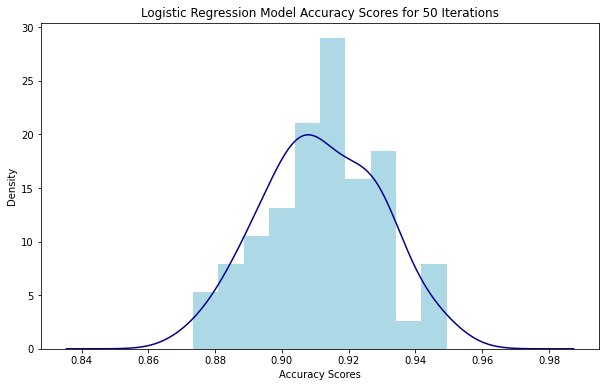

In [55]:
# visualization for logistic regression accuracy
plt.style.use("seaborn-dark-palette")
plt.figure(figsize = (10,6))
plt.hist(logreg_accuracy, density = True, color="lightblue")
logreg_accuracy.plot(kind = "kde", color = "darkblue")
plt.xlabel("Accuracy Scores")
plt.title("Logistic Regression Model Accuracy Scores for 50 Iterations")
plt.show()

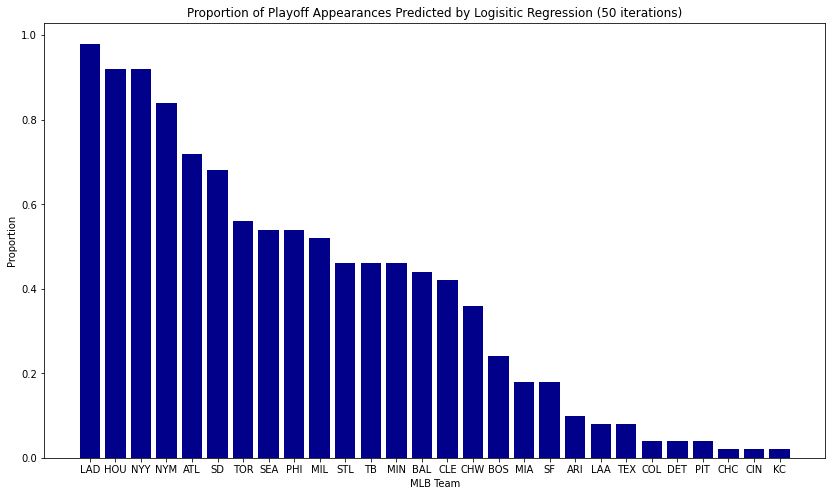

In [56]:
# visualization for logistic regression predictions
plt.style.use("seaborn-dark-palette")
plt.figure(figsize=(14,8))
plt.bar(range(len(logreg_result)),logreg_result, color = "darkblue")
plt.xticks(range(len(logreg_result)), logreg_result.index.map(MLB_abr_map))
plt.xlabel("MLB Team")
plt.ylabel("Proportion")
plt.title("Proportion of Playoff Appearances Predicted by Logisitic Regression (50 iterations)")
plt.show()

## Decision Tree

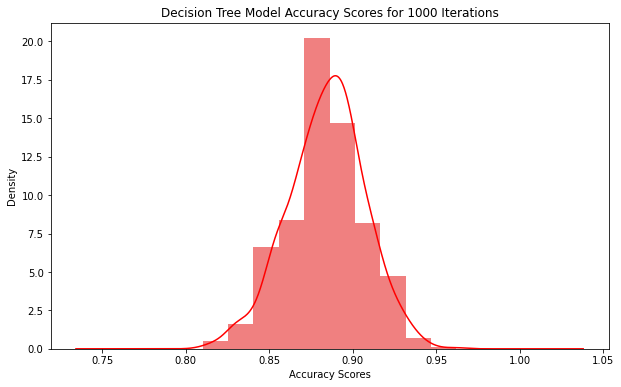

In [57]:
# vizualization for decision tree model accuracy
plt.style.use("seaborn-muted")
plt.figure(figsize = (10,6))
plt.hist(dt_accuracy, density = True, color="lightcoral")
dt_accuracy.plot(kind = "kde", color = "red")
plt.xlabel("Accuracy Scores")
plt.title("Decision Tree Model Accuracy Scores for 1000 Iterations")
plt.show()

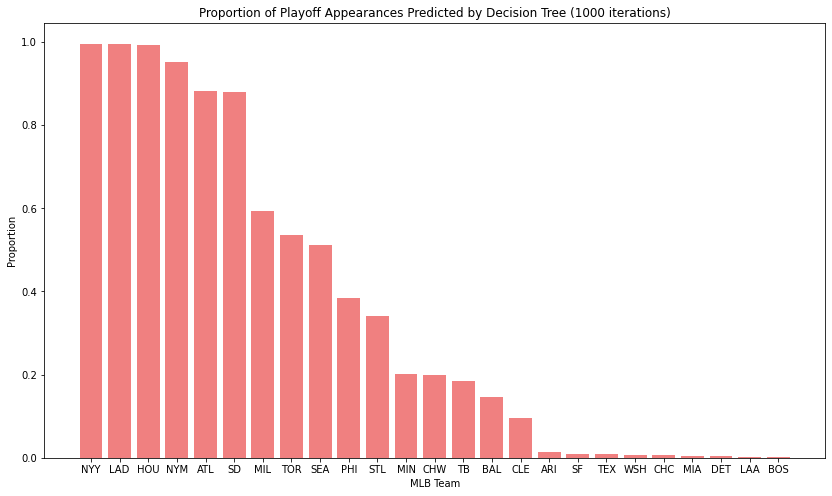

In [58]:
# visualization for decision tree model predictions
plt.style.use("seaborn-muted")
plt.figure(figsize=(14,8))
plt.bar(range(len(dt_result)),dt_result, color = "lightcoral")
plt.xticks(range(len(dt_result)), dt_result.index.map(MLB_abr_map))
plt.xlabel("MLB Team")
plt.ylabel("Proportion")
plt.title("Proportion of Playoff Appearances Predicted by Decision Tree (1000 iterations)")
plt.show()

## KNN

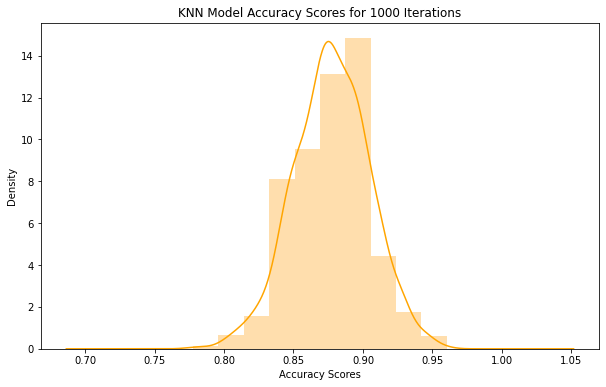

In [59]:
# visualization for KNN accuracy
plt.style.use("seaborn-pastel")
plt.figure(figsize = (10,6))
plt.hist(knn_accuracy, density = True, color= "navajowhite")
knn_accuracy.plot(kind = "kde", color = "orange")
plt.xlabel("Accuracy Scores")
plt.title("KNN Model Accuracy Scores for 1000 Iterations")
plt.show()

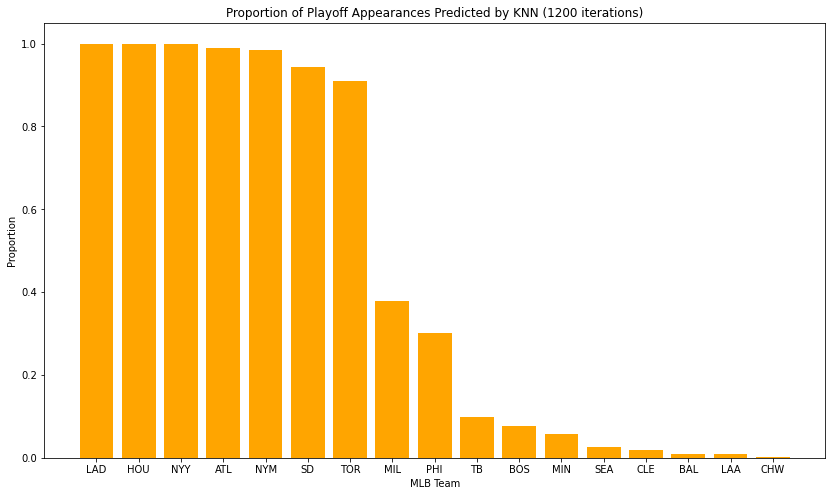

In [62]:
# visualization for knn predictions
plt.style.use("seaborn-pastel")
plt.figure(figsize=(14,8))
plt.bar(range(len(knn_result)),knn_result, color = "orange")
plt.xticks(range(len(knn_result)), knn_result.index.map(MLB_abr_map))
plt.xlabel("MLB Team")
plt.ylabel("Proportion")
plt.title("Proportion of Playoff Appearances Predicted by KNN (1200 iterations)")
plt.show()